In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# Load the dataset
df = pd.read_csv('data/car_sales_data.csv')

In [91]:
# Get basic info on the data
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [93]:
df.describe()

,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


In [94]:
df.isnull().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

In [95]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

In [96]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(12)

In [97]:
# show duplicate rows
df[df.duplicated()]

,manufacturer,model,engine size,fuel type,year of manufacture,mileage,price
5426,VW,Polo,1.2,Petrol,2003,10000,8024
9862,Ford,Mondeo,1.4,Diesel,1987,224569,883
14745,BMW,Z4,2.4,Petrol,1999,12000,13410
19020,Toyota,Yaris,1.0,Petrol,1996,13500,5087
19337,VW,Polo,1.0,Petrol,2000,11500,5950
23927,VW,Polo,1.2,Petrol,2021,1000,27901
25368,VW,Golf,1.2,Diesel,2011,6000,17401
28576,VW,Polo,1.2,Petrol,2003,10000,8024
34246,VW,Passat,2.0,Diesel,2003,10000,16087
35647,Ford,Focus,1.6,Petrol,2019,2000,39636


In [98]:
# drop duplicate rows
df = df.drop_duplicates()

In [99]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

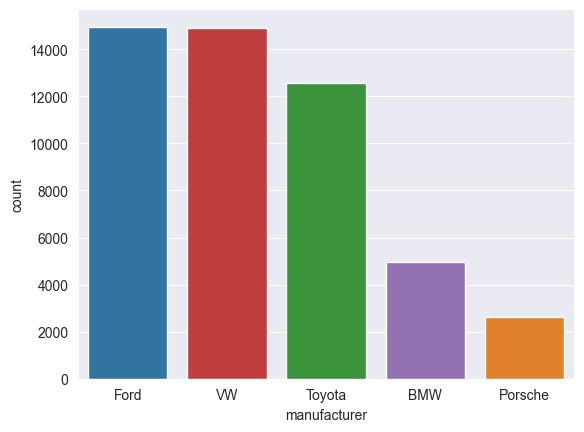

In [100]:
# Now that we have cleaned the data, let's visualize it
# Let's see the most common car brands
sns.countplot(x='manufacturer', data=df, order=df['manufacturer'].value_counts().index, hue='manufacturer')
plt.show()

In [101]:
# Let's create a combined column with the manufacturer and model for more detailed analysis
df['manufacturer model'] = df['manufacturer'] + ' ' + df['model']

<Axes: xlabel='count', ylabel='manufacturer model'>

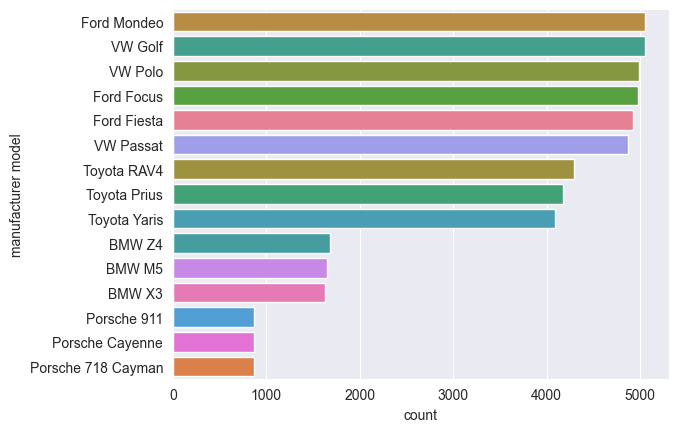

In [102]:
# Most common car models
sns.countplot(y='manufacturer model', data=df, order=df['manufacturer model'].value_counts().index, hue='manufacturer model')

<Axes: xlabel='manufacturer', ylabel='price'>

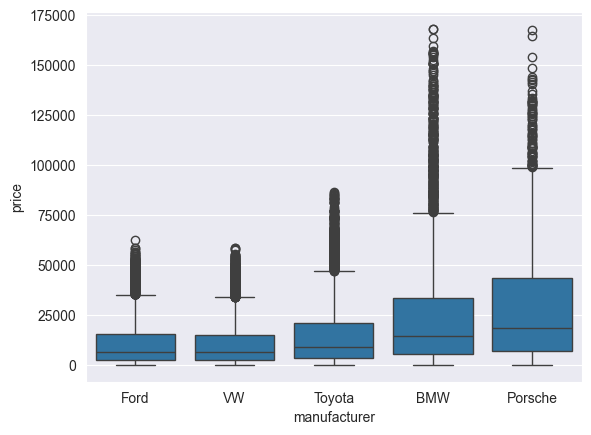

In [103]:
# Let's see the price range of different car brands
sns.boxplot(x='manufacturer', y='price', data=df, order=df['manufacturer'].value_counts().index)

Here we can see that Porsche and BMW have the highest price range, with a lot of outliers outside the box, this means that there are a lot of expensive cars from these brands

<Axes: xlabel='mileage', ylabel='price'>

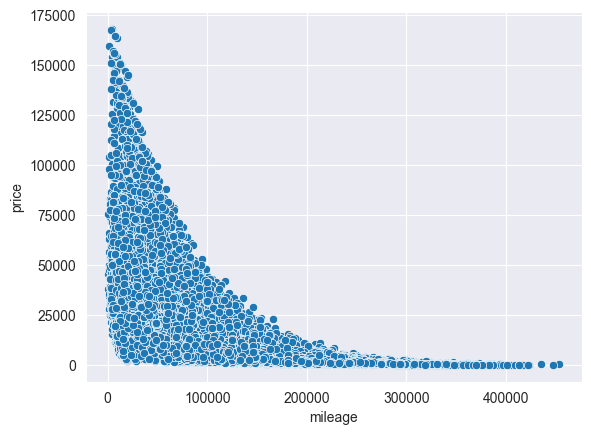

In [104]:
# Mileage and price correlation
sns.scatterplot(x='mileage', y='price', data=df)

Here we can see that the price of the car decreases as the mileage increases

<Axes: xlabel='year of manufacture', ylabel='price'>

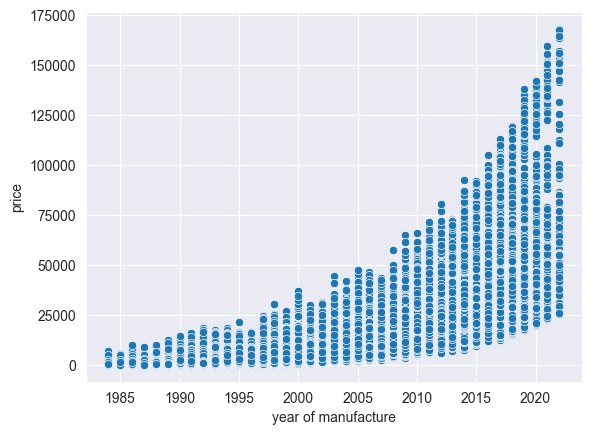

In [105]:
# Year of manufacture and price correlation
sns.scatterplot(x='year of manufacture', y='price', data=df)

Obviously, the price of the car decreases the older it is

In [106]:
# Average and maximum price of different car brands
df.groupby('manufacturer')['price'].agg(['mean', 'max'])

,mean,max
manufacturer,,
BMW,24431.679089,168081
Ford,10671.473455,62748
Porsche,29103.764661,167774
Toyota,14341.099418,86353
VW,10361.781497,58588


In [107]:
# Let's see the most common car models
df['manufacturer model'].value_counts().head()

manufacturer model
Ford Mondeo    5057
VW Golf        5049
VW Polo        4988
Ford Focus     4975
Ford Fiesta    4924
Name: count, dtype: int64

In [108]:
# Average mileage of cars
df.groupby('manufacturer model')['mileage'].mean()


manufacturer model
BMW M5                113930.555623
BMW X3                112177.148897
BMW Z4                112470.939538
Ford Fiesta           112472.058489
Ford Focus            114084.909146
Ford Mondeo           111041.963813
Porsche 718 Cayman    113056.261822
Porsche 911           110986.150229
Porsche Cayenne       110878.737931
Toyota Prius          111654.215296
Toyota RAV4           112339.802889
Toyota Yaris          110059.148166
VW Golf               112416.069321
VW Passat             115063.122818
VW Polo               113104.874298
Name: mileage, dtype: float64